Cuales son las tecnologias mas optimas para Data Analysts

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv(r'C:\Users\Territorio DSC\Desktop\Python codes\Python practices - Data science\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Limpiar columna de skills
def parse_job_skills(skills):
    if pd.notna(skills):
        return ast.literal_eval(skills)
    return skills

# Aplicar la función a la columna
df['job_skills'] = df['job_skills'].apply(parse_job_skills)

In [3]:
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_USA = df_DA_USA.dropna(subset = ['salary_year_avg'])

df_DA_USA_exploded = df_DA_USA.explode('job_skills')

df_DA_USA_exploded.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


In [4]:
df_DA_skills = df_DA_USA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

# Renombrar nombre de columnas
df_DA_skills = df_DA_skills.rename(columns = {'count' : 'skill_count', 'median' : 'median_salary'})

# Sacar el porcentaje de habilidades
DA_job_count = len(df_DA_USA) # Obtener el total de filas del dataframe de Data Analysts en USA

df_DA_skills['skill_count_percent'] = round((df_DA_skills['skill_count'] / DA_job_count) * 100,0)

# Se filtran las habilidades que tienen mas del 5% de popularidad
df_DA_skills = df_DA_skills[df_DA_skills['skill_count_percent'] > 5]

df_DA_skills

,skill_count,median_salary,skill_count_percent
job_skills,,,
sql,2508,91000.00,58.0
excel,1808,84392.00,42.0
python,1431,97500.00,33.0
tableau,1364,92875.00,31.0
sas,926,90000.00,21.0
r,893,92500.00,21.0
power bi,838,90000.00,19.0
powerpoint,462,85000.00,11.0
word,461,81194.75,11.0


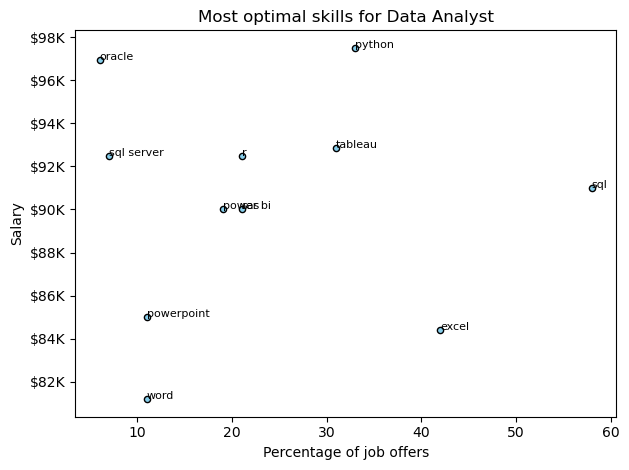

In [5]:
from matplotlib.ticker import FuncFormatter

df_DA_skills.plot(kind='scatter',
                  x='skill_count_percent',
                  y='median_salary',
                  color='skyblue',
                  edgecolor='black')

# Agregar etiquetas (sin evitar overlapping)
for i, skill in enumerate(df_DA_skills.index):
    x = df_DA_skills.iloc[i]['skill_count_percent']
    y = df_DA_skills.iloc[i]['median_salary']
    plt.text(x, y, skill, fontsize=8)

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Percentage of job offers')
plt.ylabel('Salary')
plt.title('Most optimal skills for Data Analyst')
plt.tight_layout()
plt.show()